<a href="https://colab.research.google.com/github/rlfwo93/machine-learning/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

# mnist란 ?

- MNIST 데이터란 필기 숫자의 분류를 위한 학습 데이터 집합입니다. 즉, 이 데이터는 어지럽게 필기된 숫자가 어떤 숫자에 해당하는지 정확하게 맞추기 위한 학습을 위한 것입니다.

- 사이즈는 28x28의 크기를 가진다. 이미지의 값은 0 또는 1이다 (흑,백)

- 0 부터 9 까지의 숫자를 28x28 픽셀 크기의 이미지로 구성

-  1개의 레코드(1개의행 row)는 785개의 숫자로 구성
-  1열에는 정답이있다.
-  2열부터 마지막 열까지는 정답을 나타내는 이미지의 색을 나타내는 숫자 값들이 784개 연속으로 있다.

 * 흑백 이미지를 표현 할떄 숫자 0에 가까울 수록 검은색으로. 255에 가까울수록 하얀새으로 나타내는데 2열부터 마지막 열까지 나열된 숫자가 바로 이미지 색을 나타내는 정보.


In [2]:
data = np.loadtxt("sample_data/mnist_train_small.csv", delimiter=",")
# delimiter는 CSV 파일이 뭘로 나누어져 있는지(\t, ' ', '+' 등)를 나타낸다
# delimniter= "," 는 ,를 기준으로 파일을 나뉘어준다.


In [20]:
data

"""
 array([[6., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.],
       ...,
       [2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.]])

       => 맨처음에 나오는 값이 정답이고 뒤에나오는 값들은 정답을 이루는 숫자들임.

       """

array([[6., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.],
       ...,
       [2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.]])

In [3]:
data.shape,type(data)

#((20000, 785) = 행렬을 나타냄, 
#numpy.ndarray) = 넘파이로 만든 배열.

((20000, 785), numpy.ndarray)

# Hand-written number images and target level
# data: images of hand-written numbers (28 X 28 pixels)
# target: numbers (0 ~ 9)

In [6]:
data[:,0]  # target (hand-written numbers)

array([6., 5., 7., ..., 2., 9., 5.])

In [8]:
data[-1,0]

5.0

In [9]:
data[-5:,0]

array([0., 1., 2., 9., 5.])

In [12]:
data[:,0].shape

(20000,)

In [16]:
target = data[:,0] #data의 모든행 0번째 원소
target

array([6., 5., 7., ..., 2., 9., 5.])

In [17]:
target[:5],target[-5:]

(array([6., 5., 7., 9., 5.]), array([0., 1., 2., 9., 5.]))

In [18]:
ndata = data[:,1:]  # ndata (iamge of hand-written numbers), 784 pixels for each number
#첫번째값은 레이블이고, 뒤에있는 값들이 답을 구성하는 데이터이기떄문에 첫번째 값은 빼줌
print(ndata.shape) # 20000,784 
print("784 = {}".format(28*28)) # 784 픽셀인것을 알려줌
print(type(ndata)) # 넘파이의 배열 오브젝트

(20000, 784)
784 = 784
<class 'numpy.ndarray'>



# 행벡터(1X784)를 이미지 배열 (28X28)로 재구성

In [19]:
ndata[0,0:]  # first number


array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,  24.,  67.,  67.,  18.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0., 13

In [21]:
ndata[0,0:].shape, target[0]  # 첫번째 숫자는 6

((784,), 6.0)

In [27]:
first_num = ndata[0,0:].reshape(28,28) # 맨 첫번째 행렬을 28x28로
first_num
print(type(first_num))

<class 'numpy.ndarray'>


In [26]:
last_num = ndata[-1,0:].reshape(28,28) # 맨 마지막  행렬을 28x28로
last_num
print(type(last_num))

<class 'numpy.ndarray'>


# Matplotlib 

- matplotlib은 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 파이썬 라이브러리로써, 우리는 matplotlib의 pyplot을 이용하게 됩니다.

이는 mathworks에서 개발한 매트랩(MATLAB)과 비슷한 형태를 가지고 있습니다.

matplotlib을 이용하면 우리가 이전에 알아본 numpy나 pandas에서 사용되는 자료구조를 쉽게 시각화 할 수 있습니다.


In [33]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
# %matplotlib inline 의 역할은 notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것



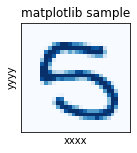

In [54]:
plt.figure(figsize=(2,2)) # plt.figure(figsize=(x, y))를 입력하면 그림 크기를 결정
# figure = 그림의 단위
# figsize = figure의 크기를 결정
plt.imshow(last_num, cmap="Blues")
""" plt.imshow 함수는 default 값이 color로 출력하게 되어있어서 내부적으로 변환이 이뤄지는것 
같은데, cmap(color map)형식 인자값을 다양하게 변경가능하며, 
plt.imshow(cv_img, cmap='gray') 으로 변경하면 gray형식으로 출력되는것을 확인 """


plt.grid(False)
plt.xticks([])
plt.title("matplotlib sample")
plt.xlabel("xxxx")
plt.ylabel("yyyy")
plt.yticks([])
plt.show()